## Simple machine learning notebook

In [1]:
# cell setup and imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score,\
 recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, label_binarize
import matplotlib.pyplot as plt

In [121]:
# # Install KaggleHub if not already installed
# # !pip install kagglehub[pandas-datasets]

# import kagglehub
# from kagglehub import KaggleDatasetAdapter

# # Set correct file path as per dataset structure
# file_path = "Students Social Media Addiction.csv"

# # Load the dataset as a pandas DataFrame
# df = kagglehub.load_dataset(
#     KaggleDatasetAdapter.PANDAS,
#     "adilshamim8/social-media-addiction-vs-relationships",
#     file_path,
# )

# print("First 5 records:")
# print(df.head())

First 5 records:
   Student_ID  Age  Gender Academic_Level     Country  Avg_Daily_Usage_Hours  \
0           1   19  Female  Undergraduate  Bangladesh                    5.2   
1           2   22    Male       Graduate       India                    2.1   
2           3   20  Female  Undergraduate         USA                    6.0   
3           4   18    Male    High School          UK                    3.0   
4           5   21    Male       Graduate      Canada                    4.5   

  Most_Used_Platform Affects_Academic_Performance  Sleep_Hours_Per_Night  \
0          Instagram                          Yes                    6.5   
1            Twitter                           No                    7.5   
2             TikTok                          Yes                    5.0   
3            YouTube                           No                    7.0   
4           Facebook                          Yes                    6.0   

   Mental_Health_Score Relationship_Status  C

/tmp/ipykernel_80/3660395464.py:11: DeprecationWarning: load_dataset is deprecated and will be removed in a future version.
  df = kagglehub.load_dataset(


In [2]:
df = pd.read_csv('StudentsSocialMediaAddiction.csv')
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [3]:
# data loading and exploration 
# you can use this link to download https://www.kaggle.com/datasets/adilshamim8/social-media-addiction-vs-relationships
# df = pd.read_csv('StudentsSocialMediaAddiction.csv')
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 705 entries, 0 to 704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    705 non-null    int64  
 1   Age                           705 non-null    int64  
 2   Gender                        705 non-null    object 
 3   Academic_Level                705 non-null    object 
 4   Country                       705 non-null    object 
 5   Avg_Daily_Usage_Hours         705 non-null    float64
 6   Most_Used_Platform            705 non-null    object 
 7   Affects_Academic_Performance  705 non-null    object 
 8   Sleep_Hours_Per_Night         705 non-null    float64
 9   Mental_Health_Score           705 non-null    int64  
 10  Relationship_Status           705 non-null    object 
 11  Conflicts_Over_Social_Media   705 non-null    int64  
 12  Addicted_Score                705 non-null    int64  
dtypes: fl

,Student_ID,Age,Avg_Daily_Usage_Hours,Sleep_Hours_Per_Night,Mental_Health_Score,Conflicts_Over_Social_Media,Addicted_Score
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,353.000000,20.659574,4.918723,6.868936,6.226950,2.849645,6.436879
std,203.660256,1.399217,1.257395,1.126848,1.105055,0.957968,1.587165
min,1.000000,18.000000,1.500000,3.800000,4.000000,0.000000,2.000000
25%,177.000000,19.000000,4.100000,6.000000,5.000000,2.000000,5.000000
50%,353.000000,21.000000,4.800000,6.900000,6.000000,3.000000,7.000000
75%,529.000000,22.000000,5.800000,7.700000,7.000000,4.000000,8.000000
max,705.000000,24.000000,8.500000,9.600000,9.000000,5.000000,9.000000


In [4]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,Female,Undergraduate,Bangladesh,5.2,Instagram,Yes,6.5,6,In Relationship,3,8
1,2,22,Male,Graduate,India,2.1,Twitter,No,7.5,8,Single,0,3
2,3,20,Female,Undergraduate,USA,6.0,TikTok,Yes,5.0,5,Complicated,4,9
3,4,18,Male,High School,UK,3.0,YouTube,No,7.0,7,Single,1,4
4,5,21,Male,Graduate,Canada,4.5,Facebook,Yes,6.0,6,In Relationship,2,7


In [5]:
# feature engineering
df_copy = df


In [6]:
# identify category columns
cat_cols = df.select_dtypes(include=['object']).columns

In [7]:
# one hot encode them
for col in cat_cols:
    df[col] = LabelEncoder().fit_transform(df[col])

In [8]:
df['Age'] = df['Age'].astype('int')
df['Gender'] = df['Gender'].astype('category')
df['Gender'] = df['Gender'].cat.codes

df['Academic_Level'] = df['Academic_Level'].astype('category')
df['Academic_Level'] = df['Academic_Level'].cat.codes

df['Most_Used_Platform'] = df['Most_Used_Platform'].astype('category')
df['Most_Used_Platform'] = df['Most_Used_Platform'].cat.codes

df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].astype('category')
df['Affects_Academic_Performance'] = df['Affects_Academic_Performance'].cat.codes

df['Relationship_Status'] = df['Relationship_Status'].astype('category')
df['Relationship_Status'] = df['Relationship_Status'].cat.codes
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score
0,1,19,0,2,10,5.2,1,1,6.5,6,1,3,8
1,2,22,1,0,39,2.1,7,0,7.5,8,2,0,3
2,3,20,0,2,102,6.0,6,1,5.0,5,0,4,9
3,4,18,1,1,101,3.0,11,0,7.0,7,2,1,4
4,5,21,1,0,18,4.5,0,1,6.0,6,1,2,7


In [9]:
def create_feature(df):
    affected_count = (df['Affects_Academic_Performance'] == 1).sum()
    total_count = len(df)
    percent_affected = (affected_count / total_count) * 100
    df['Percent_Affected'] = round(percent_affected, 1)
    return df

In [10]:
print(df.isnull().sum())


Student_ID                      0
Age                             0
Gender                          0
Academic_Level                  0
Country                         0
Avg_Daily_Usage_Hours           0
Most_Used_Platform              0
Affects_Academic_Performance    0
Sleep_Hours_Per_Night           0
Mental_Health_Score             0
Relationship_Status             0
Conflicts_Over_Social_Media     0
Addicted_Score                  0
dtype: int64


In [11]:
# or we can see any col is null 
print(df[df.columns[df.isnull().any()]])

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...]

[705 rows x 0 columns]


In [12]:
df = create_feature(df)

In [13]:
df.head()

,Student_ID,Age,Gender,Academic_Level,Country,Avg_Daily_Usage_Hours,Most_Used_Platform,Affects_Academic_Performance,Sleep_Hours_Per_Night,Mental_Health_Score,Relationship_Status,Conflicts_Over_Social_Media,Addicted_Score,Percent_Affected
0,1,19,0,2,10,5.2,1,1,6.5,6,1,3,8,64.3
1,2,22,1,0,39,2.1,7,0,7.5,8,2,0,3,64.3
2,3,20,0,2,102,6.0,6,1,5.0,5,0,4,9,64.3
3,4,18,1,1,101,3.0,11,0,7.0,7,2,1,4,64.3
4,5,21,1,0,18,4.5,0,1,6.0,6,1,2,7,64.3


In [14]:
# model training and evaluation
X = df.drop(['Addicted_Score'], axis=1)

In [15]:
y = df['Addicted_Score']

In [16]:
# One-hot encode them
X_encoded = pd.get_dummies(X, columns=cat_cols)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [18]:
# train the model
model = RandomForestClassifier()

In [19]:
model.fit(X_train, y_train)

RandomForestClassifier()

In [20]:
# evaluation metrics
y_pred = model.predict(X_test)

In [21]:
y_pred_train = model.predict(X_train)

In [22]:
y_pred_proba = model.predict_proba(X_test)

In [23]:
y_pred_proba_train = model.predict_proba(X_train)

In [24]:
y_pred, y_pred_train, y_pred_proba, y_pred_proba_train

(array([5, 7, 5, 7, 4, 9, 3, 4, 5, 7, 8, 8, 9, 7, 4, 5, 5, 7, 7, 8, 5, 8,
        8, 9, 4, 5, 7, 7, 5, 7, 9, 7, 7, 6, 8, 7, 7, 7, 7, 5, 8, 5, 7, 7,
        8, 5, 9, 6, 5, 7, 7, 6, 4, 5, 7, 8, 6, 7, 8, 9, 4, 5, 6, 7, 6, 5,
        8, 5, 8, 8, 7, 7, 5, 5, 4, 7, 5, 9, 7, 7, 7, 5, 8, 9, 8, 5, 7, 5,
        8, 6, 5, 9, 8, 7, 4, 8, 5, 5, 7, 4, 5, 3, 5, 7, 5, 5, 8, 5, 8, 5,
        7, 5, 5, 7, 8, 5, 8, 4, 4, 8, 7, 7, 9, 7, 7, 7, 8, 4, 4, 6, 8, 8,
        4, 7, 7, 8, 4, 7, 8, 4, 5]),
 array([5, 8, 8, 9, 4, 6, 8, 6, 7, 7, 8, 9, 8, 5, 7, 9, 5, 7, 9, 7, 7, 8,
        7, 8, 8, 7, 4, 7, 5, 9, 8, 7, 7, 9, 4, 7, 4, 5, 7, 6, 8, 8, 8, 7,
        8, 4, 7, 4, 9, 7, 5, 7, 9, 5, 5, 6, 8, 9, 7, 5, 5, 6, 4, 7, 8, 3,
        7, 5, 8, 6, 8, 9, 6, 8, 7, 7, 7, 5, 4, 6, 9, 7, 8, 7, 8, 4, 5, 6,
        8, 3, 7, 9, 8, 7, 7, 5, 4, 4, 4, 7, 8, 8, 7, 6, 4, 3, 7, 8, 4, 8,
        7, 5, 7, 8, 5, 5, 7, 5, 6, 5, 8, 6, 9, 5, 7, 5, 9, 7, 7, 6, 4, 5,
        5, 4, 9, 7, 5, 7, 8, 8, 5, 8, 5, 6, 7, 7, 5, 8, 9, 8, 5, 6, 4, 7,
 

In [25]:
accuracy = model.score(X_test, y_test)

In [26]:
accuracy

0.9858156028368794

In [27]:
scores = cross_val_score(model, X_encoded, y, cv=5)

/home/dhiraj-patra/myenv/lib/python3.12/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


In [28]:
# Each value in the list represents the accuracy score for one fold in 5-fold cross-validation
print(scores)

[0.79432624 0.95035461 0.95035461 0.95744681 0.80141844]


In [29]:
print("Mean accuracy:", scores.mean())


Mean accuracy: 0.8907801418439716


In [30]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.7)   # Elastic Net

In [31]:
model.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.7)

In [32]:
model.score(X_test, y_test)

0.9490024897182955

In [33]:
model = Lasso(alpha=0.1)   # L1 regularization

In [34]:
model.fit(X_train, y_train)

Lasso(alpha=0.1)

In [35]:
model.score(X_test, y_test)

0.9452489591991577

In [36]:
model = Ridge(alpha=1.0)   # L2 regularization

In [37]:
model.fit(X_train, y_train)

Ridge()

In [38]:
model.score(X_test, y_test)

0.9771131105619746

In [39]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()   

In [40]:
model.fit(X_train, y_train)

LinearRegression()

In [41]:
model.score(X_test, y_test)

0.9620251530481059

In [42]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=5) 

In [43]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [46]:
model.score(X_test, y_test)

0.9574468085106383

In [48]:
# ensemble method
import xgboost as xgb
from xgboost import XGBClassifier


In [49]:
print(X_train.shape)  # should be (n, m)
print(y_train.shape)  # should be (n,)


(564, 139)
(564,)


In [50]:
le = LabelEncoder()
y_encoded = le.fit_transform(df['Addicted_Score'])
print(len(y_encoded))  # must be 564

705


In [51]:
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
print(len(y_encoded))

705


In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2)


In [53]:
print(len(X_train), len(y_train))  # both must be 564
print(len(X_test), len(y_test))  # both must be 141

564 564
141 141


In [54]:
model = XGBClassifier()

In [55]:
model.fit(X_train, y_train)  # Correct


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [56]:
model.score(X_test, y_test)  # Correct

0.9645390070921985

In [57]:
# True labels and predicted labels
cm = confusion_matrix(y_test, y_pred)

# Display as DataFrame for better readability
cm_df = pd.DataFrame(cm, index=[f"Actual {i}" for i in range(cm.shape[0])],
                        columns=[f"Predicted {i}" for i in range(cm.shape[1])])

print(cm_df)

          Predicted 0  Predicted 1  Predicted 2  Predicted 3  Predicted 4  \
Actual 0            0            0            0            1            0   
Actual 1            0            0            0            1            4   
Actual 2            0            0            0            1            4   
Actual 3            0            0            0            2            2   
Actual 4            0            0            2            7           13   
Actual 5            0            0            0            1           10   
Actual 6            0            0            0            3            2   
Actual 7            0            0            0            0            0   
Actual 8            0            0            0            0            0   

          Predicted 5  Predicted 6  Predicted 7  Predicted 8  
Actual 0            0            1            1            0  
Actual 1            2            5            2            4  
Actual 2            2            9      

In [58]:
le = LabelEncoder()
le.fit(df_copy['Addicted_Score'])

LabelEncoder()

In [59]:
for idx, label in enumerate(le.classes_):
    print(f"{idx} → {label}")


0 → 2
1 → 3
2 → 4
3 → 5
4 → 6
5 → 7
6 → 8
7 → 9


In [60]:
# Select target class (e.g., class 3)
target_class = 3

# Convert to binary: 1 if class is target, else 0
y_test_binary = (y_test == target_class).astype(int)
y_pred_binary = (y_pred == target_class).astype(int)

# Compute binary confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test_binary, y_pred_binary).ravel()

print(f"Class {target_class} → TP: {tp}, FP: {fp}, TN: {tn}, FN: {fn}")

Class 3 → TP: 0, FP: 2, TN: 115, FN: 24


In [61]:
import numpy as np
unique, counts = np.unique(y, return_counts=True)
print(dict(zip(unique, counts)))

# Drop rows with 'Addicted_Score' == 0
df_filtered = df_copy[df_copy['Addicted_Score'] != 0].copy()

{np.int64(2): np.int64(1), np.int64(3): np.int64(16), np.int64(4): np.int64(83), np.int64(5): np.int64(136), np.int64(6): np.int64(61), np.int64(7): np.int64(209), np.int64(8): np.int64(144), np.int64(9): np.int64(55)}


In [63]:
# Load your dataframe (df_copy must be defined already)
df = df_copy.copy()

# Step 1: Filter out classes with < 2 samples
value_counts = df_copy['Addicted_Score'].value_counts()
valid_classes = value_counts[value_counts >= 2].index
df_filtered = df_copy[df_copy['Addicted_Score'].isin(valid_classes)].copy()

X = df_filtered.drop(['Addicted_Score', 'Student_ID'], axis=1)
le = LabelEncoder()
y = le.fit_transform(df_filtered['Addicted_Score'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train the model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_proba = model.predict_proba(X_test)

# Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# Binarize y_test for AUC (multiclass)
classes = np.unique(y)
y_test_bin = label_binarize(y_test, classes=classes)

# Compute AUC
auc_score = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='weighted')

# Print all metrics
print(f"Accuracy     : {accuracy:.2f}")
print(f"Precision    : {precision:.2f}")
print(f"Recall       : {recall:.2f}")
print(f"F1 Score     : {f1:.2f}")
print(f"AUC (OVR)    : {auc_score:.2f}")


/home/dhiraj-patra/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:39:18] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy     : 0.97
Precision    : 0.97
Recall       : 0.97
F1 Score     : 0.97
AUC (OVR)    : 1.00


In [64]:
# Train-test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Train model
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model.fit(X_train, y_train)

# Predict probabilities
y_proba = model.predict_proba(X_test)

classes = np.unique(y_test)

# Binarize labels for AUC
y_test_bin = label_binarize(y_test, classes=classes)

# Compute AUC
auc_score = roc_auc_score(y_test_bin, y_proba, multi_class='ovr', average='weighted')
print(f"Multiclass AUC (OVR, weighted): {auc_score:.4f}")


Multiclass AUC (OVR, weighted): 0.9988


/home/dhiraj-patra/myenv/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [20:39:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [65]:
# Accuracy
acc = accuracy_score(y_test, y_pred)

# Precision
prec = precision_score(y_test, y_pred, average='weighted')

# Recall
rec = recall_score(y_test, y_pred, average='weighted')

# F1 Score
f1 = f1_score(y_test, y_pred, average='weighted')

# Print all
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {prec:.2f}")
print(f"Recall: {rec:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"AUC: {auc_score:.2f}")

Accuracy: 0.97
Precision: 0.97
Recall: 0.97
F1 Score: 0.97
AUC: 1.00


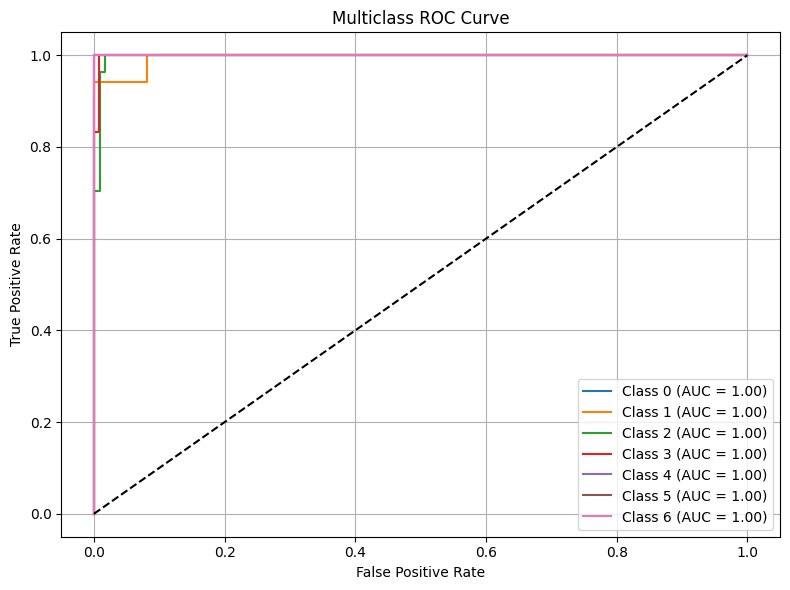

In [66]:
# Plot ROC Curve per class
plt.figure(figsize=(8, 6))
for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_proba[:, i])
    auc_score = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {classes[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()